# Predict Customer Buying Behaviour

## Loading Dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("customer_booking (1).csv", encoding='ISO-8859-1')

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


## 2. EDA

In [4]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [5]:
df.shape

(50000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
#Data coversion 
df['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [8]:
mapping = {
    "Mon":1,
    "Tue":2,
    "Wed":3,
    "Thu":4,
    "Fri":5,
    "Sat":6,
    "Sun":7,
}

df['flight_day'] = df['flight_day'].map(mapping)

In [9]:
df['flight_day'].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [10]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


## Making New Feature

### Question?
As we want to know if a customer will book a trip on weekend, so here lets make a new feature of list and call it is_weekend, if the flight day is weekend with value 1. and 0 if the flight booking in weekdays

In [11]:
is_weekend = []

for i in range(len(df)):
    if df['flight_day'][i] == 6 or df['flight_day'][i] ==7:
        is_weekend.append(1)
    else:
        is_weekend.append(0)

In [12]:
df['is_weekend'] = is_weekend
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0


### Data Analysis

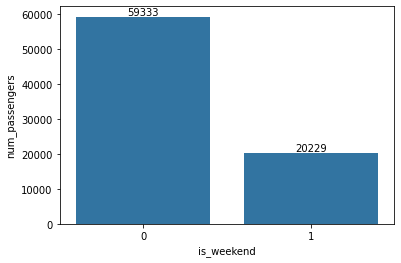

In [13]:
weekend = df.groupby('is_weekend')['num_passengers'].sum().reset_index()
ax = sns.barplot(x='is_weekend', y='num_passengers', data=weekend)
ax.bar_label(ax.containers[0])
plt.show()

In [14]:
#lets fing the average numbers of passengers per day:

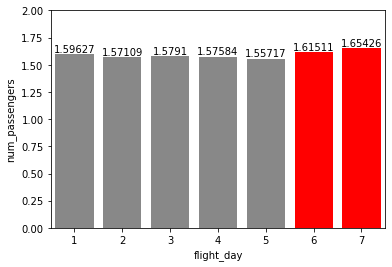

In [15]:
dayperday = df.groupby('flight_day')['num_passengers'].mean().reset_index()

ax = sns.barplot(data = dayperday, x= 'flight_day', y= 'num_passengers')
for bar in ax.patches:
    bar.set_facecolor('#888888')
    
ax.bar_label(ax.containers[0])
plt.ylim(0,2)
ax.patches[5].set_facecolor('red')
ax.patches[6].set_facecolor('red')
plt.show()

### Observation: 
As we can see from the graph the no of passengers are high on weekdays than weekends but if we see the avg no of passengers, weekends have a higher value than weekdays

In [16]:
df['flight_day'].value_counts().reset_index().sort_values(by='index')

,index,flight_day
0,1,8102
2,2,7673
1,3,7674
3,4,7424
4,5,6761
6,6,5812
5,7,6554


### Observation:

From the table we can see that weekends have less flight that weekdays, lets conside the route col to see on which route has mpst passengers.

In [17]:
route = df[df['is_weekend'] == 1].groupby('route').agg({'num_passengers': 'sum'}).reset_index().sort_values(by='num_passengers', ascending=False)

In [18]:
route[:5]

,route,num_passengers
4,AKLKUL,1284
243,DMKKIX,462
606,PENTPE,396
375,ICNSIN,311
538,MELSGN,306


### Observation: 
As we can see from the table this 5 routes have the most passengers, so my recommendation to the board is that we increase the number of flight to these 5 routes on weekends.

## 3. Machine Learning

In [19]:
#Data Preparation

In [20]:
#Dropping an redundant feature
df.drop('flight_day', axis=1, inplace=True)

In [21]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend
0,2,Internet,RoundTrip,262,19,7,AKLDEL,New Zealand,1,0,0,5.52,0,1
1,1,Internet,RoundTrip,112,20,3,AKLDEL,New Zealand,0,0,0,5.52,0,1
2,2,Internet,RoundTrip,243,22,17,AKLDEL,India,1,1,0,5.52,0,0
3,1,Internet,RoundTrip,96,31,4,AKLDEL,New Zealand,0,0,1,5.52,0,1
4,2,Internet,RoundTrip,68,22,15,AKLDEL,India,1,0,1,5.52,0,0


In [22]:
df['route'].value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

Since the route col has 799 unique value and its big its better to drop the route column

In [23]:
df.drop('route', axis=1, inplace=True)

In [24]:
df.head(2)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend
0,2,Internet,RoundTrip,262,19,7,New Zealand,1,0,0,5.52,0,1
1,1,Internet,RoundTrip,112,20,3,New Zealand,0,0,0,5.52,0,1


In [25]:
df['booking_origin'].value_counts()

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

As the booking_origin also has many unique value, and instead of deleting lets change the value of booking origin, which initially contains the name of the country to the name of the continent 

In [26]:
import pycountry_convert as pc

continent = []
index = []

df['booking_origin'] = df['booking_origin'].replace('Myanmar (Burma)', 'Myanmar')

for i in range(len(df)):
    country = df['booking_origin'][i]
    try:
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_name = pc.country_alpha2_to_continent_code(country_code)
        continent.append(continent_name)
    except:
        continent.append('Others')

df['booking_continent'] = continent

In [27]:
df['booking_continent'].value_counts()

AS        29740
OC        18960
EU          578
NA          525
Others       87
AF           69
SA           41
Name: booking_continent, dtype: int64

We now have less unique value to represent booking origin so we can now drop the booking_origin col 

In [28]:
df.drop('booking_origin', axis=1, inplace=True)

In [29]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend,booking_continent
0,2,Internet,RoundTrip,262,19,7,1,0,0,5.52,0,1,OC
1,1,Internet,RoundTrip,112,20,3,0,0,0,5.52,0,1,OC
2,2,Internet,RoundTrip,243,22,17,1,1,0,5.52,0,0,AS
3,1,Internet,RoundTrip,96,31,4,0,0,1,5.52,0,1,OC
4,2,Internet,RoundTrip,68,22,15,1,0,1,5.52,0,0,AS


### Data Cleaning 

In [30]:
df.sample()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend,booking_continent
26708,1,Internet,RoundTrip,110,3,4,0,1,1,7.57,0,0,AS


### Outliers

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   wants_extra_baggage    50000 non-null  int64  
 7   wants_preferred_seat   50000 non-null  int64  
 8   wants_in_flight_meals  50000 non-null  int64  
 9   flight_duration        50000 non-null  float64
 10  booking_complete       50000 non-null  int64  
 11  is_weekend             50000 non-null  int64  
 12  booking_continent      50000 non-null  object 
dtypes: float64(1), int64(9), object(3)
memory usage: 5.0+ MB


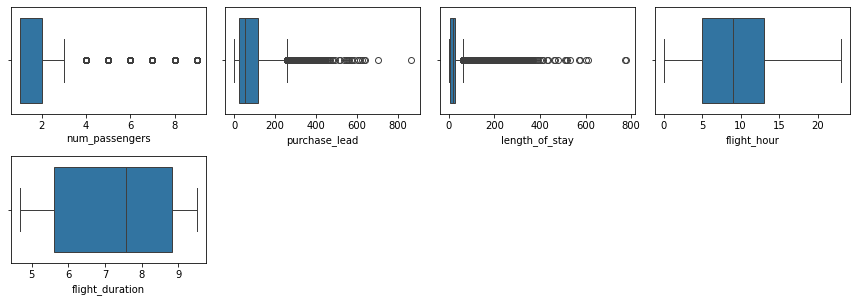

In [32]:
num = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
plt.figure(figsize=(12,8))

for i, column in enumerate (df[num].columns, 1):
    plt.subplot(4,4,i)
    sns.boxplot(data=df[num], x=df[column])
    plt.tight_layout()

### Observation:

We can see purchase_lead and length_of_stay have a lot of outliers values, so we can delete the outliers with zscore 

In [33]:
from scipy import stats
import numpy as np

print(f'Total rows before deleting outlier : {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in num:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    df = df[filtered_entries]
    
print(f'Total rows after deleting outlier : {len(df)}')

Total rows before deleting outlier : 50000
Total rows after deleting outlier : 47115


C:\Users\udgar\AppData\Local\Temp\ipykernel_13256\1298918145.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]
C:\Users\udgar\AppData\Local\Temp\ipykernel_13256\1298918145.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]
C:\Users\udgar\AppData\Local\Temp\ipykernel_13256\1298918145.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]
C:\Users\udgar\AppData\Local\Temp\ipykernel_13256\1298918145.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]


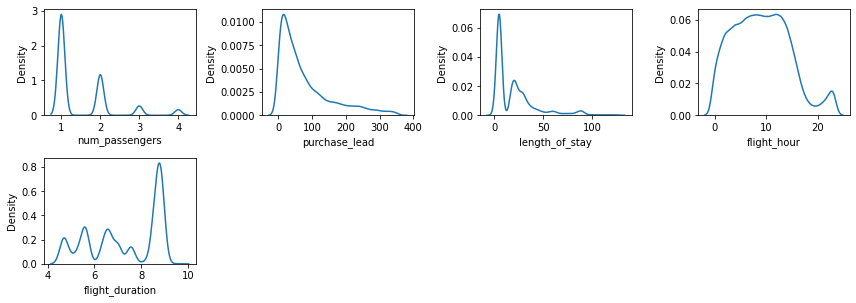

In [34]:
plt.figure(figsize=(12,8))

for i, column in enumerate (df[num].columns, 1):
    plt.subplot(4,4,i)
    sns.kdeplot(data=df[num], x=df[column])
    plt.tight_layout()

### Observation

It doent have the normal distribution

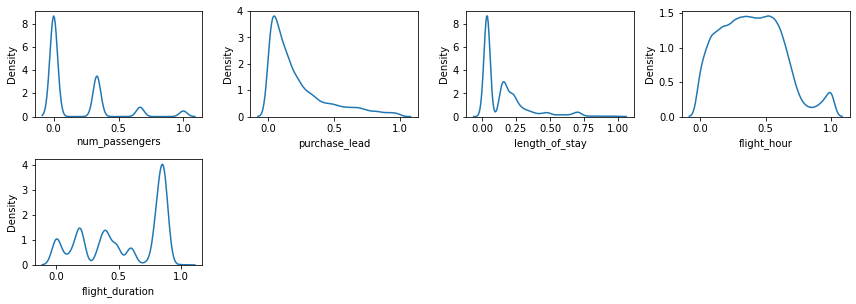

In [35]:
from sklearn.preprocessing import Normalizer

num_max = df[num].max()
num_min = df[num].min()

num_features = (df[num] - num_min) / (num_max - num_min)
num_features.head()

df[num] = num_features

plt.figure(figsize=(12,8))

for i, column in enumerate (df[num].columns, 1):
    plt.subplot(4,4,i)
    sns.kdeplot(data=df, x=df[column])
    plt.tight_layout()

### Observation:

After performing feature transformation our numerical data have a better distribution than before feature transformation.

### Feature Encoding

In [36]:
from sklearn import preprocessing

label_encode = ['sales_channel']
one_hot = ['booking_continent']
                
mapping_trip_type = {
    'RoundTrip'  : 0,
    'OneWay'     : 1,
    'CircleTrip' : 2
}               

df['trip_type'] = df['trip_type'].map(mapping_trip_type)

df['sales_channel'] = preprocessing.LabelEncoder().fit_transform(df['sales_channel'])

onehots = pd.get_dummies(df['booking_continent'], prefix='booking_continent')
df = df.join(onehots)

df.drop('booking_continent', axis=1, inplace=True)

In [37]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend,booking_continent_AF,booking_continent_AS,booking_continent_EU,booking_continent_NA,booking_continent_OC,booking_continent_Others,booking_continent_SA
0,0.333333,0,0,0.742210,0.150794,0.304348,1,0,0,0.175983,0,1,0,0,0,0,1,0,0
1,0.000000,0,0,0.317280,0.158730,0.130435,0,0,0,0.175983,0,1,0,0,0,0,1,0,0
2,0.333333,0,0,0.688385,0.174603,0.739130,1,1,0,0.175983,0,0,0,1,0,0,0,0,0
3,0.000000,0,0,0.271955,0.246032,0.173913,0,0,1,0.175983,0,1,0,0,0,0,1,0,0
4,0.333333,0,0,0.192635,0.174603,0.652174,1,0,1,0.175983,0,0,0,1,0,0,0,0,0


## Split Data

In [38]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['booking_complete'], axis=1)
y = df['booking_complete']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
y_train.value_counts(normalize=True)

0    0.851136
1    0.148864
Name: booking_complete, dtype: float64

### Observation: 
The data is unbalance, so we need to balance the data by using sampling
### Why use sampling? 
Ans - Sampling can help to balance the data when the data has different numbers of examples for each class or category. Sampling can improve the model’s performance and accuracy, but it can also have some drawbacks, such as loss of information, overfitting, and complexity.

### Sampling Data ( Over Sampling)

In [40]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
x_over, y_over = sm.fit_resample(x_train, y_train.ravel()) 

### Traing the Machine Learning Model

In [41]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def confusionmatrix(predictions):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_over)
  
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_over, y_pred_train))

In [42]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


Accuracy (Test Set): 0.84
Precision (Test Set): 0.37
Recall (Test Set): 0.04
F1-Score (Test Set): 0.07
roc_auc (test-proba): 0.51
roc_auc (train-proba): 0.54


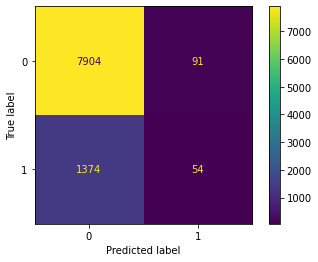

In [43]:
import xgboost as xgb

clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)

predictions = clf.predict(x_test)
confusionmatrix(predictions)
eval_classification(clf)

In [44]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(x_over, y_over)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.27
Recall (Test Set): 0.21
F1-Score (Test Set): 0.24
roc_auc (test-proba): 0.55
roc_auc (train-proba): 0.99


              precision    recall  f1-score   support

           0       0.86      0.90      0.88      7995
           1       0.27      0.21      0.24      1428

    accuracy                           0.79      9423
   macro avg       0.57      0.55      0.56      9423
weighted avg       0.77      0.79      0.78      9423



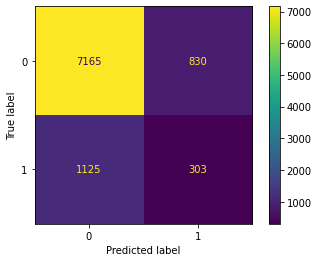

In [45]:
predictions = xg_tuned.predict(x_test)
confusionmatrix(predictions)
print(classification_report(y_test, predictions))

From the score we can conclude that XGBoost with hyperparameter have a better prediction.